<a href="https://colab.research.google.com/github/fralfaro/python_ml/blob/main/docs/introduction/012_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

**Scikit-Learn** (también conocido como sklearn) es una de las bibliotecas más populares de aprendizaje automático en Python. Proporciona una amplia gama de herramientas y algoritmos de aprendizaje automático para tareas como clasificación, regresión, agrupamiento y reducción de la dimensionalidad.

Algunas características:

* Scikit-Learn se basa en otras bibliotecas populares de Python, como NumPy, SciPy y matplotlib, y es compatible con una variedad de herramientas y paquetes de análisis de datos de Python, como pandas.

* Scikit-Learn se destaca en su facilidad de uso, la eficiencia computacional y la documentación detallada. Scikit-Learn también ofrece una amplia gama de herramientas para la selección de características, la evaluación del rendimiento y la validación cruzada.

* Scikit-Learn es una herramienta útil para cualquier persona que trabaje en el campo del aprendizaje automático, desde principiantes hasta expertos en la materia.

## Api de Scikit-Learn

La API de Scikit-Learn está diseñada con varios principios rectores en mente, tal como se describe en [Scikit-Learn API paper](https://arxiv.org/abs/1309.0238). 

Estos principios incluyen:

* **Consistencia**: todos los objetos en Scikit-Learn deben tener una interfaz consistente. Esto significa que deben compartir un conjunto común de métodos, como `fit`, `predict` y `transform`, para que puedan utilizarse de manera intercambiable en tuberías y otros contextos.

* **Inspección**: los objetos de Scikit-Learn deben exponer su estado interno como atributos públicamente accesibles. Esto permite a los usuarios inspeccionar el estado del objeto y comprender cómo realiza predicciones.

* **Jerarquía limitada de objetos**: Scikit-Learn debe tener una jerarquía limitada de objetos, con solo unos pocos objetos principales que se pueden componer de diferentes maneras. Esto mantiene la API simple y fácil de aprender.

* **Composición**: Scikit-Learn debe proporcionar una manera simple y flexible de componer algoritmos en tuberías. Esto permite a los usuarios construir modelos complejos a partir de bloques de construcción simples.

* **Valores predeterminados razonables**: Scikit-Learn debe proporcionar valores predeterminados razonables para la mayoría de los parámetros, para que los usuarios puedan obtener resultados razonables sin tener que ajustar una gran cantidad de hiperparámetros.

## Utilizando Scikit-Learn

<img src="https://miro.medium.com/max/1400/1*3LSbIDBmAquzdFGzCBtNLg.png" width = "600"  align="center"  />

Los pasos para utilizar la API de Scikit-Learn son los siguientes:

* Organizar los datos en una matriz de características ($X$) y un vector de targets ($y$) siguiendo la discusión anterior.
* Elegir una clase de modelo importando la clase de estimador adecuada de Scikit-Learn.
* Elegir los hiperparámetros del modelo instanciando esta clase con los valores deseados.
* Ajustar el modelo a los datos llamando al método `fit()` de la instancia del modelo.
* Aplicar el modelo a nuevos datos:
    * Para el aprendizaje supervisado, a menudo predecimos etiquetas para datos desconocidos utilizando el método `predict()`.
    * Para el aprendizaje no supervisado, a menudo transformamos o inferimos propiedades de los datos utilizando los métodos `transform()` o `predict()`.
Ahora veremos algunos ejemplos simples de aplicar métodos de aprendizaje supervisado y no supervisado.

### Ejemplo de aprendizaje supervisado: regresión lineal simple

Como ejemplo de este proceso, consideremos una simple regresión lineal, es decir, el caso común de ajustar una línea a datos $(x, y)$. Utilizaremos los siguientes datos simples para nuestro ejemplo de regresión:

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

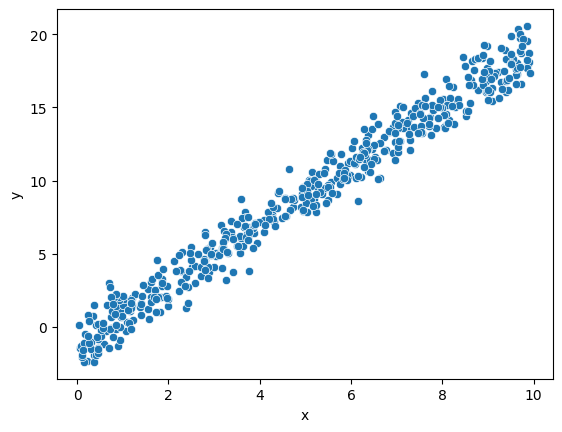

In [2]:
# Generar datos de ejemplo
rng = np.random.RandomState(42)

n_size = 500
x = 10 * rng.rand(n_size)
y = 2 * x - 1 + rng.randn(n_size)
df = pd.DataFrame({'x': x,'y': y })

# graficar
sns.scatterplot(data=df, x="x", y="y")
plt.show()

#### Trabajar Matriz de Características y Arreglo de Etiquetas
 
Definiremos la matriz de características bidimensional y una matriz unidimensional de objetivos.

In [3]:
# definir X e y
X = df[['x']] # como dataframe
y = df['y'] # como series

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada elemento
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de x_train: (400, 1)
Tamaño de y_train: (400,)
Tamaño de x_test: (100, 1)
Tamaño de y_test: (100,)


#### Elige una clase de modelo

En Scikit-Learn, cada clase de modelo está representada por una clase de Python. Entonces, por ejemplo, si nos gustaría calcular un modelo de regresión lineal simple, podemos importar la clase de regresión lineal:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### Elija los hiperparámetros del modelo

Un punto importante es que una **clase de modelo** no es lo mismo que una **instancia de un modelo**.

Dependiendo de la clase de modelo con la que estemos trabajando, podríamos necesitar responder una o varias preguntas como las siguientes:

* ¿ Queremos ajustar el **offset** (es decir, la intersección en `y`) ?
* ¿ Queremos que el modelo esté **normalizado** ?
* ¿ Queremos preprocesar nuestras características para agregar **flexibilidad** al modelo ?
* ¿ Qué grado de **regularización** queremos usar en nuestro modelo ?
* ¿ Cuántos **componentes de modelo queremos usar** ?

Estos son ejemplos de las decisiones importantes que deben tomarse una vez que se selecciona la clase de modelo. Estas decisiones suelen representarse como hiperparámetros, o parámetros que deben establecerse antes de que el modelo se ajuste a los datos. En **Scikit-Learn**, los hiperparámetros se eligen pasando valores en la instanciación del modelo. Exploraremos cómo escoger los mejores hiperparámetros más adelante.

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase `LinearRegression` y especificar que nos gustaría ajustar la intersección usando el hiperparámetro `fit_intercept`:


In [6]:
# Entrenar el modelo con los datos de entrenamiento
model = LinearRegression(fit_intercept=True)
#model = RandomForestRegressor()
model

LinearRegression()

Tenga en cuenta que cuando se crea una instancia del modelo, la única acción es almacenar estos valores de hiperparámetro. En particular, aún **no hemos aplicado el modelo a ningún dato**: la API de Scikit-Learn deja muy clara la distinción entre la **elección del modelo** y **la aplicación del modelo a los datos**.

#### Ajusta el modelo a tus datos

Ahora es el momento de aplicar nuestro modelo a los datos. Esto se puede hacer con el método `fit()` del modelo:

In [7]:
# aplicar modelo a los datos
model.fit(x_train, y_train)

LinearRegression()

El `fit()` hace que se lleven a cabo una serie de cálculos internos dependientes del modelo, y los resultados de estos cálculos se almacenan en atributos específicos del modelo que el usuario puede explorar. En Scikit-Learn, por convención, todos los parámetros del modelo que se aprendieron durante el proceso `fit()` tienen guiones bajos al final; por ejemplo en este modelo lineal, tenemos lo siguiente:

In [8]:
# coeficientes
model.coef_

array([2.02327729])

In [9]:
# intercepto
model.intercept_

-1.1227537053702488

Estos dos parámetros representan la **pendiente** y la **intersección** del ajuste lineal simple a los datos. En comparación con la definición de datos, vemos que están muy cerca de la pendiente de entrada de 2 y la intersección de -1.

#### Predecir  datos desconocidos

Una vez que se entrena el modelo, la tarea principal del aprendizaje automático supervisado es **evaluarlo** en función de lo que dice sobre los nuevos datos que no formaban parte del conjunto de entrenamiento. En Scikit-Learn, esto se puede hacer usando el método `predict()`. Por el bien de este ejemplo, nuestros "nuevos datos" serán una cuadrícula de valores de x, y preguntaremos qué valores de y predice el modelo:

In [10]:
# nuevos valores con etiqueta (y) desconocido
xfit = x_test.copy()

In [11]:
# predecir a partir del modelo el valor de y
yfit = model.predict(xfit)

Finalmente, visualicemos los resultados trazando primero los datos sin procesar y luego ajuste este modelo:

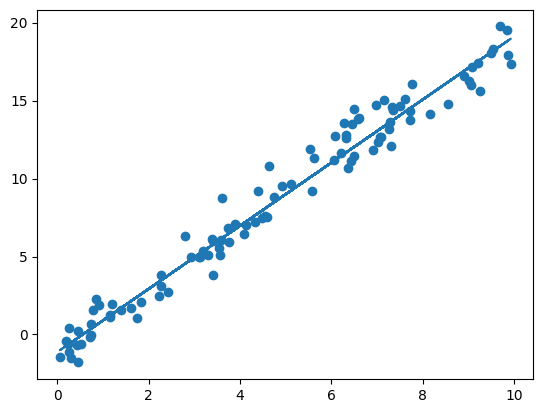

In [12]:
# visualizar resultados
plt.scatter(x_test, y_test)
plt.plot(xfit, yfit);

### Ejemplo de aprendizaje supervisado: clasificación Iris

Utilizando el conjunto de datos de **Iris** ,la pregunta será la siguiente: dado un modelo entrenado en una parte de los datos de Iris, ¿qué tan bien podemos predecir las etiquetas restantes?

Nos gustaría evaluar el modelo con datos que no ha visto antes, por lo que dividiremos los datos en un **conjunto de entrenamiento** (train set) y un **conjunto de prueba** (test set). Esto podría hacerse a mano, pero es más conveniente usar la función de utilidad `train_test_split`:

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# definir X e y
X_iris = iris.drop('species',axis=1) # como dataframe
y_iris= iris['species'] # como series

In [15]:
from sklearn.model_selection import train_test_split

# separar informacion
x_train, x_test, y_train, y_test = train_test_split(X_iris , y_iris, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada elemento
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de x_train: (120, 4)
Tamaño de y_train: (120,)
Tamaño de x_test: (30, 4)
Tamaño de y_test: (30,)


Ahora aplicamos el modelo de **regresión logística**:

In [16]:
# 1. elige la clase de modelo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
# 2. instanciar el modelo
model = LogisticRegression(solver='liblinear')
#model = RandomForestClassifier()

In [18]:
# 3. ajuste el modelo a los datos
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [19]:
# 4. predecir con nuevos datos
y_model = model.predict(x_test)

Finalmente, podemos usar `accuracy_score` para ver la fracción de etiquetas pronosticadas que coinciden con su valor real:

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_score(y_test, y_model)

1.0

Con una precisión igual al **100%**, vemos que incluso este algoritmo de clasificación muy ingenuo es efectivo para este conjunto de datos en particular.

> **Nota**: más adelante entraremos en detalles respecto a las métricas de un modelo supervisado (regresión y clasificación)

### Ejemplo de aprendizaje no supervisado: dimensionalidad del iris

En este ejemplo, buscamos **reducir la dimensionalidad** de los datos de Iris para visualizarlos más fácilmente. Recuerde que los datos de Iris son de cuatro dimensiones: hay cuatro características registradas para cada muestra.

La tarea de la reducción de la dimensionalidad es preguntar si existe una representación adecuada de menor dimensión que conserve las características esenciales de los datos. A menudo, la reducción de la dimensionalidad se utiliza como ayuda para visualizar datos: después de todo, **¡es mucho más fácil trazar datos en dos dimensiones que en cuatro dimensiones o más!**.

Aquí utilizaremos el **análisis de componentes principales** (PCA), que es una técnica de reducción de dimensionalidad lineal rápida. Le pediremos al modelo que devuelva dos componentes, es decir, una representación bidimensional de los datos.

Siguiendo la secuencia de pasos descrita anteriormente, tenemos:

In [21]:
# 1. Elija la clase de modelo
from sklearn.decomposition import PCA  

In [22]:
# 2. Instancia el modelo con hiperparámetros
model = PCA(n_components=2)    

In [23]:
# 3. Ajuste a los datos. ¡Observe que y no está especificado!
model.fit(X_iris)    

PCA(n_components=2)

In [24]:
# 4. Transforma los datos a dos dimensiones
X_2D = model.transform(X_iris)     

Ahora vamos a graficar nuestros resultados:

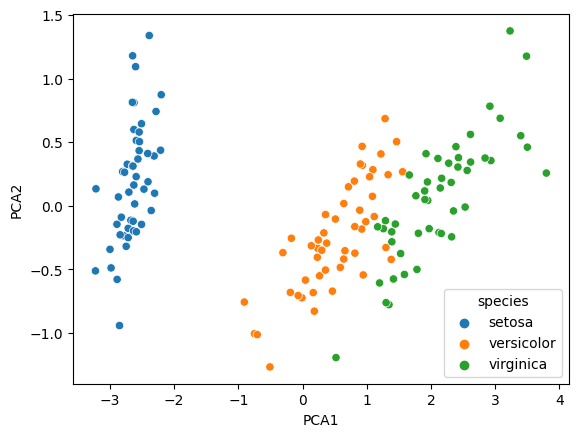

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.scatterplot(x="PCA1", y ="PCA2", hue='species', data=iris);

Vemos que en la representación bidimensional, las especies están bastante bien separadas, **¡aunque el algoritmo PCA no tenía conocimiento de las etiquetas de las especies!**. 

Esto nos indica que una clasificación relativamente sencilla probablemente será efectiva en el conjunto de datos, como vimos antes.

### Aprendizaje no supervisado: Iris clustering

Veamos a continuación cómo aplicar la agrupación en clústeres a los datos de Iris. Un algoritmo de agrupamiento intenta encontrar distintos grupos de datos sin referencia a ninguna etiqueta. Aquí usaremos un poderoso método de agrupamiento llamado **KMeans**.

In [26]:
# 1. Elija la clase de modelo
from sklearn.cluster import KMeans

In [27]:
# 2. Instancia el modelo con hiperparámetros
model = KMeans(n_clusters=3, n_init=100 )

In [28]:
# 3. Ajuste a los datos. ¡Observe que y no está especificado!
model.fit(X_iris) 

KMeans(n_clusters=3, n_init=100)

In [29]:
# 4. Determinar las etiquetas de los grupos                 
y_kmeans = model.predict(X_iris)        

Como antes, agregaremos la etiqueta del grupo al Iris DataFrame y usaremos **Seaborn** para trazar los resultados:

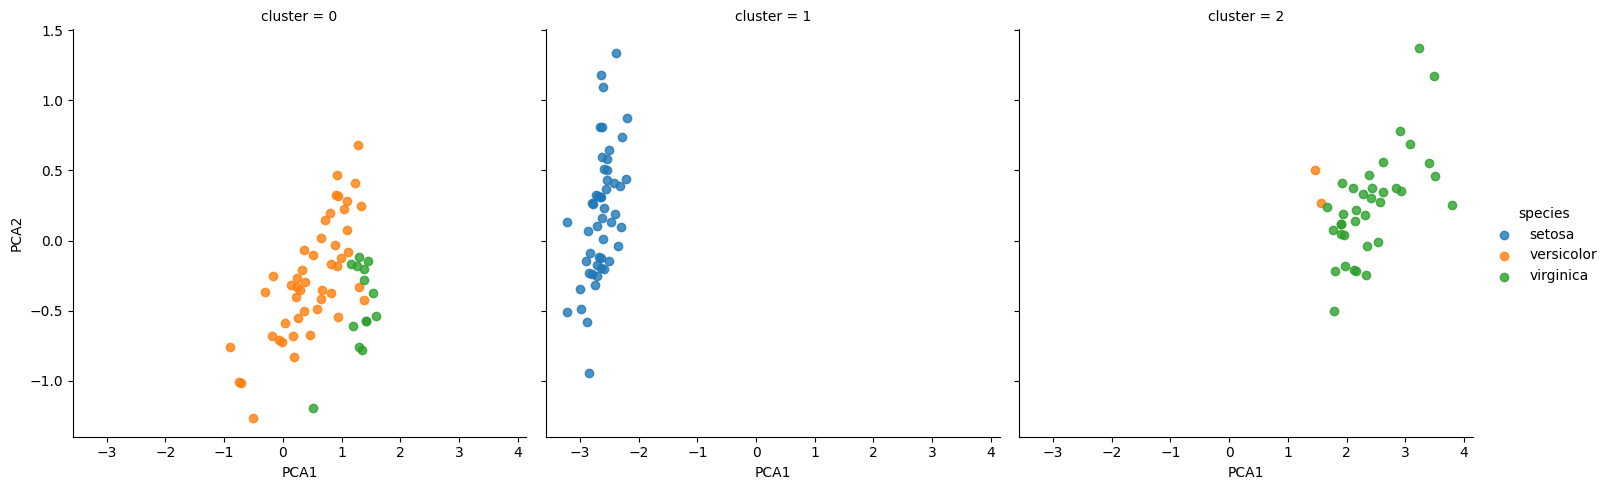

In [30]:
iris['cluster'] = y_kmeans

sns.lmplot(x = "PCA1", y = "PCA2", data=iris,
           hue='species',col='cluster', fit_reg=False);

Al dividir los datos por número de grupo, vemos exactamente qué tan bien el algoritmo **KMeans** ha recuperado la etiqueta subyacente.

Esto significa que incluso sin un experto que nos diga las etiquetas de especies de las flores individuales, las medidas de estas flores son lo suficientemente distintas como para que podamos identificar automáticamente la presencia de estos diferentes grupos de especies con un simple algoritmo de agrupación. 